## Libraries

In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

## Path

In [ ]:
MODELS_DIR = Path("/content/drive/MyDrive/Colab Notebooks")
SKLEARN_MODEL_PATH = MODELS_DIR.joinpath("sklearn/web_classifier_model.sav")

SKLEARN_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)

## Train Naive Bayes model using Scikit-Learn

In [ ]:
names = ['URL', 'Category']
df = pd.read_csv('URL Classification.csv', names=names, na_filter=False)

In [ ]:
df

,URL,Category
1,http://www.liquidgeneration.com/,Adult
2,http://www.onlineanime.org/,Adult
3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
4,http://www.galeon.com/kmh/,Adult
5,http://www.fanworkrecs.com/,Adult
...,...,...
1562974,http://www.maxpreps.com/,Sports
1562975,http://www.myscore.com/,Sports
1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports


In [ ]:
df1 = df[1:2001]
df2 = df[50000:52000]
df3 = df[520000:522000]
df4 = df[535300:537300]
df5 = df[650000:652000]
df6 = df[710000:712000]
df7 = df[764200:766200]
df8 = df[793080:795080]
df9 = df[839730:841730]
df10 = df[850000:852000]
df11 = df[955250:957250]
df12 = df[1013000:1015000]
df13 = df[1143000:1145000]
df14 = df[1293000:1295000]
df15 = df[1492000:1494000]

dt = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=0)

In [ ]:
df.drop(df.index[1:2000], inplace= True)
df.drop(df.index[50000:52000], inplace= True)
df.drop(df.index[520000:522000], inplace= True)
df.drop(df.index[535300:537300], inplace= True)
df.drop(df.index[650000:652000], inplace= True)
df.drop(df.index[710000:712000], inplace= True)
df.drop(df.index[764200:766200], inplace= True)
df.drop(df.index[793080:795080], inplace= True)
df.drop(df.index[839730:841730], inplace= True)
df.drop(df.index[850000:852000], inplace= True)
df.drop(df.index[955250:957250], inplace= True)
df.drop(df.index[1013000:1015000], inplace= True)
df.drop(df.index[1143000:1145000], inplace= True)
df.drop(df.index[1293000:1295000], inplace= True)
df.drop(df.index[1492000:1494000], inplace= True)

Text(0, 0.5, 'Total Number Of Individual Category for Training')

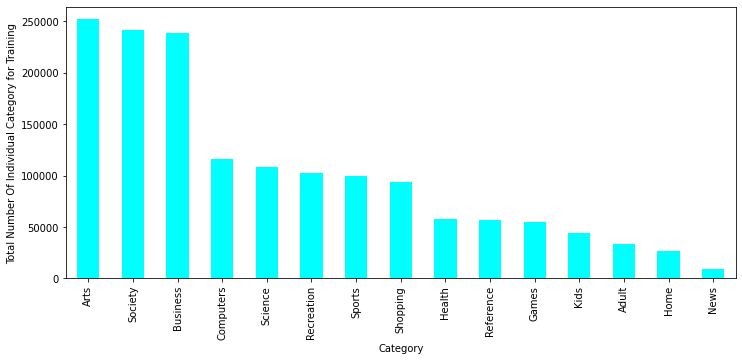

In [ ]:
df.Category.value_counts().plot(figsize=(12,5), kind='bar', color='cyan')
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Training')

Text(0, 0.5, 'Total Number Of Individual Category for Testing')

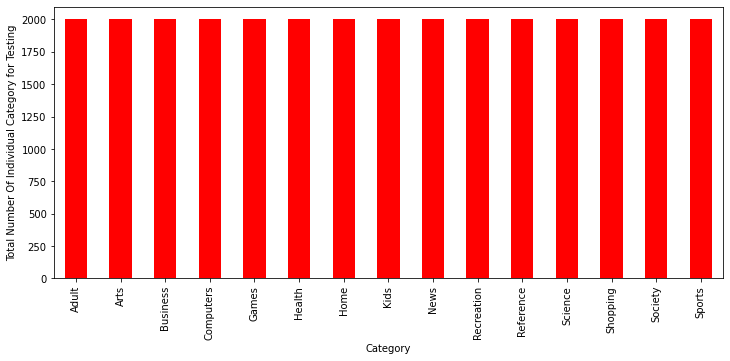

In [ ]:
dt.Category.value_counts().plot(figsize=(12,5), kind='bar', color='red');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Testing')

In [ ]:
x_train = df['URL']
y_train = df['Category']

x_test = dt['URL']
y_test = dt['Category']

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1532979,)
(1532979,)
(30000,)
(30000,)


In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(x_train, y_train)

In [ ]:
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
model = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search, random_state=0)
model = model.fit(x_train, y_train)

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print('Train Accuracy: ', str(acc_train))
print('Test Accuracy: ', str(acc_test))

Train Accuracy:  0.9503783156846898
Test Accuracy:  0.8459333333333333


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       Adult       0.98      0.17      0.29      2000
        Arts       0.49      0.91      0.63      2000
    Business       0.72      1.00      0.83      2000
   Computers       0.91      0.95      0.93      2000
       Games       0.96      0.93      0.94      2000
      Health       0.99      0.95      0.97      2000
        Home       0.98      0.87      0.92      2000
        Kids       0.93      0.64      0.75      2000
        News       1.00      0.56      0.72      2000
  Recreation       0.92      0.98      0.95      2000
   Reference       0.77      0.91      0.83      2000
     Science       0.90      0.95      0.92      2000
    Shopping       0.97      0.97      0.97      2000
     Society       0.81      1.00      0.89      2000
      Sports       0.97      0.92      0.95      2000

    accuracy                           0.85     30000
   macro avg       0.89      0.85      0.83     30000
weighted avg       0.89   

In [ ]:
labels = []
for i in df['Category']:
  if i not in labels:
    labels.append(i)
print(labels)

['Adult', 'Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science', 'Shopping', 'Society', 'Sports']


<Axes: >

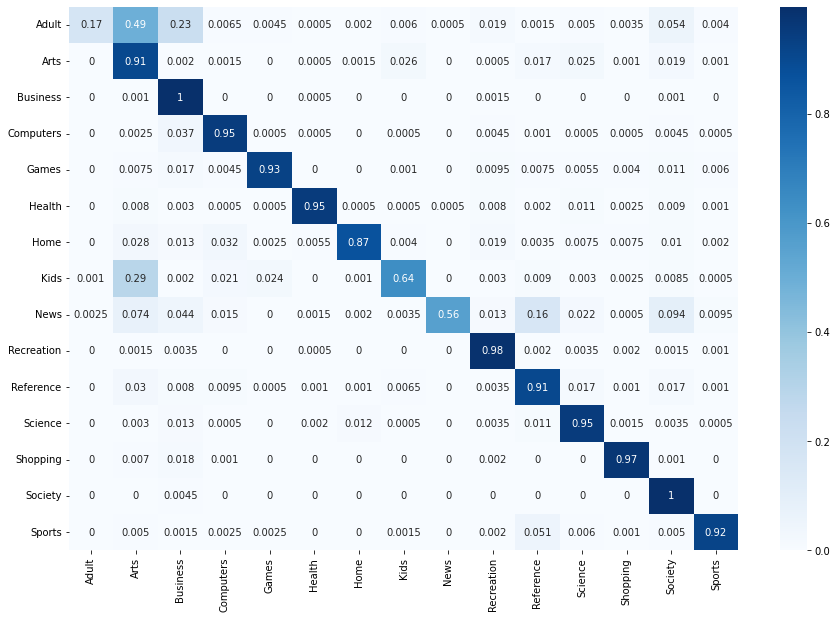

In [ ]:
array = confusion_matrix(y_test, y_pred_test)
cm = np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in labels], columns = [i for i in labels])

plt.figure(figsize = (15,10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns.heatmap(df_cm, annot=True, cmap='Blues')

In [ ]:
# save the model to disk
pickle.dump(
    model, open(SKLEARN_MODEL_PATH, "wb")
)  # export the model to a file so we can use it later